
Symbolische Transformationsmatrix T_0_5:



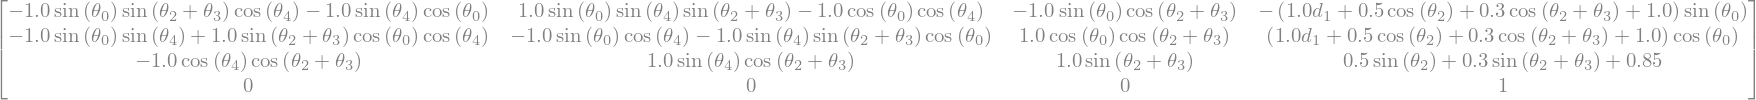

In [38]:
import sympy as sp
import roboticstoolbox as rtb
from spatialmath import SE3

# --- Symbole für Gelenkvariablen ---
theta0, d1, theta2, theta3, theta4 = sp.symbols('theta0 d1 theta2 theta3 theta4')

# --- Symbolisches DH-Modell ---
L0 = rtb.RevoluteDH(a=0, alpha=sp.rad(-90), d=0.85)
L1 = rtb.PrismaticDH(a=0, alpha=sp.rad(-90), theta=sp.rad(-90), offset=1)
L2 = rtb.RevoluteDH(a=0.5, alpha=0, d=0, offset=sp.rad(-90))
L3 = rtb.RevoluteDH(a=0, alpha=sp.rad(-90), d=0, offset=sp.rad(-90))
L4 = rtb.RevoluteDH(a=0, alpha=0, d=0.3)                             

robot = rtb.DHRobot([L0, L1, L2, L3, L4], name="DemoBot_Linear")

# --- Symbolische Vorwärtskinematik ---
T_symbolic = robot.fkine([theta0, d1, theta2, theta3, theta4])
T_simplified = sp.simplify(T_symbolic.A)

# --- Schöne Ausgabe ---
print("\n==============================")
print("Symbolische Transformationsmatrix T_0_5:")
print("==============================\n")
sp.init_printing(use_unicode=True)
display(T_simplified)


Symbolische Transformationsmatrix T_0_1:



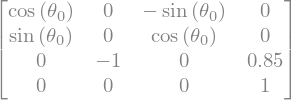


Symbolische Transformationsmatrix T_1_2:



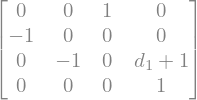


Symbolische Transformationsmatrix T_2_3:



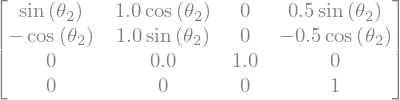


Symbolische Transformationsmatrix T_3_4:



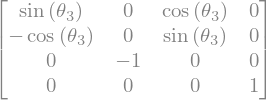


Symbolische Transformationsmatrix T_4_5:



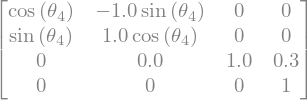


Verkettete Gesamttransformation T_0_5:



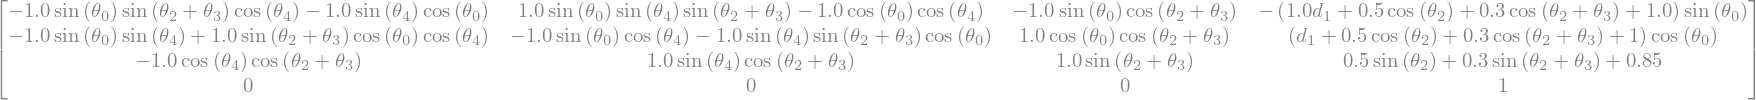

In [39]:
T_list = []

for i, link in enumerate(robot.links):
    T = link.A(q[i])        # SE3 Objekt
    T_mat = sp.Matrix(T.A)  # 4x4 SymPy-Matrix
    T_simplified = sp.simplify(T_mat)
    T_list.append(T_simplified)
    
    print("\n==============================")
    print(f"Symbolische Transformationsmatrix T_{i}_{i+1}:")
    print("==============================\n")
    try:
        from IPython.display import display
        display(T_simplified)
    except ImportError:
        print(sp.pretty(T_simplified, use_unicode=True))

# Verkettung prüfen
T_chain = sp.eye(4)
for T in T_list:
    T_chain = sp.simplify(T_chain * T)

print("\nVerkettete Gesamttransformation T_0_5:\n")
try:
    from IPython.display import display
    display(T_chain)
except ImportError:
    print(sp.pretty(T_chain, use_unicode=True))
